In [1]:
import get_NOAA
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Consulta de datos
### Inputs del código
 
 * Archivo csv con las coordendas, dichos datos deben estar en WGS84 (longitud | latitud).
 * Periodo en el cual se realizará la descarga.
 

In [2]:
## Coordenadas
sp_features = pd.read_csv("data/coordinates_stc.csv")
print(sp_features.head())
sp_features = get_NOAA.organice_coordinates(sp_features)



   longitude  latitude  event_id
0 -78.467539 -5.732122         1
1 -78.811455 -5.409062         2
2 -78.654067 -5.650240         3
3 -78.753548 -5.656234         4
4 -78.553896 -5.759910         5


In [ ]:
noaa_data = get_NOAA.extract_NOAA_data_pergeom( '2018-08-01', '2019-11-31', [sp_features[1]])
noaa_data.head()


In [7]:
## consulta de información multiples puntos
pointsinfo = []
steps = 2
for spoint in range(0,len(sp_features),steps):
    noaa_data = get_NOAA.extract_NOAA_data_pergeom( '2018-08-01', '2019-12-01', sp_features[spoint:spoint+steps])
    print("Points from {0} to {1} were extracted".format(spoint, (spoint+steps)-1))
    pointsinfo.append(noaa_data)

Points from 0 to 1 were extracted
Points from 2 to 3 were extracted
Points from 4 to 5 were extracted
Points from 6 to 7 were extracted
Points from 8 to 9 were extracted
Points from 10 to 11 were extracted
Points from 12 to 13 were extracted
Points from 14 to 15 were extracted
Points from 16 to 17 were extracted
Points from 18 to 19 were extracted
Points from 20 to 21 were extracted
Points from 22 to 23 were extracted
Points from 24 to 25 were extracted
Points from 26 to 27 were extracted
Points from 28 to 29 were extracted
Points from 30 to 31 were extracted
Points from 32 to 33 were extracted
Points from 34 to 35 were extracted
Points from 36 to 37 were extracted
Points from 38 to 39 were extracted
Points from 40 to 41 were extracted
Points from 42 to 43 were extracted
Points from 44 to 45 were extracted
Points from 46 to 47 were extracted
Points from 48 to 49 were extracted
Points from 50 to 51 were extracted
Points from 52 to 53 were extracted
Points from 54 to 55 were extracted
Po

Points from 438 to 439 were extracted
Points from 440 to 441 were extracted
Points from 442 to 443 were extracted
Points from 444 to 445 were extracted
Points from 446 to 447 were extracted
Points from 448 to 449 were extracted
Points from 450 to 451 were extracted
Points from 452 to 453 were extracted
Points from 454 to 455 were extracted
Points from 456 to 457 were extracted
Points from 458 to 459 were extracted
Points from 460 to 461 were extracted
Points from 462 to 463 were extracted
Points from 464 to 465 were extracted
Points from 466 to 467 were extracted
Points from 468 to 469 were extracted
Points from 470 to 471 were extracted
Points from 472 to 473 were extracted
Points from 474 to 475 were extracted
Points from 476 to 477 were extracted
Points from 478 to 479 were extracted
Points from 480 to 481 were extracted
Points from 482 to 483 were extracted
Points from 484 to 485 were extracted
Points from 486 to 487 were extracted
Points from 488 to 489 were extracted
Points from 

In [9]:
databack = pointsinfo

In [11]:
databack = pd.concat(databack)

In [17]:
## resumen de datos por fechas

## se pueden resumir por dias (days), mes - año (year_month) y año (year)
datasummarised = get_NOAA.summarise_noaa(databack, by = "days", 
                        averagecolumns = ['Maximum_temperature_height_above_ground_6_Hour_Interval',
                                          'Minimum_temperature_height_above_ground_6_Hour_Interval',
                                          'Specific_humidity_height_above_ground'])

datasummarised.tail()

Downward_Long-Wave_Radp_Flux_surface_6_Hour_Average  \
dates      longitude  latitude                                                         
2019-11-30 -76.257625 -6.953050                                             1625.0     
           -76.256803 -6.950052                                             1625.0     
           -76.256096 -6.947582                                             1625.0     
           -76.255168 -6.944201                                             1625.0     
           -74.280942 -7.160987                                             1675.0     

                                 Downward_Short-Wave_Radiation_Flux_surface_6_Hour_Average  \
dates      longitude  latitude                                                               
2019-11-30 -76.257625 -6.953050                                              624.0           
           -76.256803 -6.950052                                              624.0           
           -76.256096 -6.947582                                              624.0           
           -76.255168 -6.944201                                              624.0           
           -74.280942 -7.160987                                             1120.0           

                                 Precipitation_rate_surface_6_Hour_Average  \
dates      longitude  latitude                                               
2019-11-30 -76.257625 -6.953050                                   0.000070   
           -76.256803 -6.950052                                   0.000070   
           -76.256096 -6.947582                                   0.000070   
           -76.255168 -6.944201                                   0.000070   
           -74.280942 -7.160987                                   0.000327   

                                 Upward_Long-Wave_Radp_Flux_surface_6_Hour_Average  \
dates      longitude  latitude                                                       
2019-11-30 -76.257625 -6.953050                                             1761.0   
           -76.256803 -6.950052                                             1761.0   
           -76.256096 -6.947582                                             1761.0   
           -76.255168 -6.944201                                             1761.0   
           -74.280942 -7.160987                                             1826.0   

                                 Upward_Short-Wave_Radiation_Flux_surface_6_Hour_Average  \
dates      longitude  latitude                                                             
2019-11-30 -76.257625 -6.953050                                               71.0         
           -76.256803 -6.950052                                               71.0         
           -76.256096 -6.947582                                               71.0         
           -76.255168 -6.944201                                               71.0         
           -74.280942 -7.160987                                              134.0         

                                 Maximum_temperature_height_above_ground_6_Hour_Interval  \
dates      longitude  latitude                                                             
2019-11-30 -76.257625 -6.953050                                         299.000000         
           -76.256803 -6.950052                                         299.000000         
           -76.256096 -6.947582                                         299.000000         
           -76.255168 -6.944201                                         299.000000         
           -74.280942 -7.160987                                         300.825005         

                                 Minimum_temperature_height_above_ground_6_Hour_Interval  \
dates      longitude  latitude                                                             
2019-11-30 -76.257625 -6.953050                                         294.750000         
           -76.256803 -6.950052          

Float64Index([       -4.850430359,        -4.860711452,  -4.871293333000001,
              -4.8711516669999995,        -4.870072039,         -4.86586547,
                     -4.869674834,        -4.864466059,        -4.872544454,
                     -4.874853504,
              ...
                      -6.96465898,         -6.96226886,         -6.96009067,
                      -6.95795725,         -6.95516448,         -6.95304957,
                      -6.95005213,         -6.94758246,         -6.94420076,
                     -7.160987153],
             dtype='float64', name='latitude', length=264441)


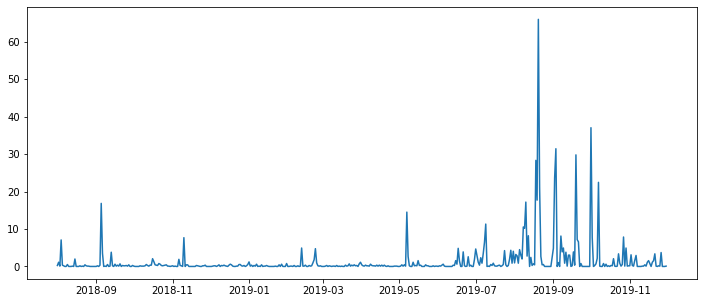

In [24]:
### gr'afica para una coordenada
print(datasummarised.index.get_level_values(2))
datatoplot = datasummarised[np.in1d(datasummarised.index.get_level_values(2), [-4.850430359])]

plt.figure(figsize=[12,5])
plt.plot(datatoplot.index.get_level_values(0), datatoplot['Precipitation_rate_surface_6_Hour_Average'].values*86400)
plt.show()

In [29]:
### exportar dato

databack.to_csv(os.path.join("D:/OneDrive - CGIAR/projects/stc_peru/results","stcdata.csv"))